    1. Data preprocessing

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

def tf(x):
    if x == "TRUE" :
        return 1
    elif x == "FALSE" :
        return 0
    else :
        return 0.5

def isnull(x):
#     if x!="None" and x!="none" and x!="Null" and x!="null" and len(x)>2 and x!=np.nan and x!='NaN':
    if x=="None" or x=="none" or x=="Null" or x=="null"  or x==np.nan or pd.isnull(x):
        return 1;
    else:
        return 0;
    

# #import data
bots_data = pd.read_csv('bots_data.csv')
nonbots_data = pd.read_csv('nonbots_data.csv')
# concatenate bots and nonbots
# df = pd.concat([bots_data, nonbots_data])
df = pd.read_csv('training_data_2_csv_UTF.csv')
df.head(1)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1


In [10]:
df.insert(4,'des_bot',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("bot|Bot|BOT"), 'des_bot'] = 1
df.insert(5,'name_bot',0)
df.loc[pd.notnull(df['name']) & df['name'].str.contains("bot|Bot|BOT"), 'name_bot'] = 1
df.insert(6,'loc_bot',0)
df.loc[pd.notnull(df['location']) & df['name'].str.contains("bot|Bot|BOT"), 'loc_bot'] = 1
df.insert(7,'loc_isnull',0)
df['loc_isnull'] = np.vectorize(isnull)(df['location'])
df.insert(8,'des_isnull',0)
df['des_isnull'] = np.vectorize(isnull)(df['description'])
df.insert(9,'url_isnull',0)
df['url_isnull'] = np.vectorize(isnull)(df['url'])
df.insert(10,'status_isnull',0)
df['status_isnull'] = np.vectorize(isnull)(df['status'])
def f(x, y, z, r):
    return x+y+z+r
df.insert(11,'screen_bot',0)
df.loc[pd.notnull(df['screen_name']) & df['screen_name'].str.contains("bot|Bot|BOT"), 'screen_bot'] = 1

df.insert(12,'des_by',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("by|By"), 'des_by'] = 1
df.insert(13,'des_tweet',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("tweet|Tweet"), 'des_tweet'] = 1
df.insert(14,'des_er',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("er,|er "), 'des_er'] = 1
df.insert(15,'des_st',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("st,|st "), 'des_st'] = 1
df.insert(16,'contain_bot',0)
df['contain_bot'] = np.vectorize(f)(df['des_bot'], df['name_bot'], df['loc_bot'],df['screen_bot'])
df.insert(17,'des_hourly',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("hourly|Hourly"), 'screen_bot'] = 1
df.insert(18,'des_randomly',0)
df.loc[pd.notnull(df['description']) & df['description'].str.contains("randomly|Randomly"), 'screen_bot'] = 1


df.head(5)

,id,id_str,screen_name,location,des_bot,name_bot,loc_bot,loc_isnull,des_isnull,url_isnull,...,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""",0,0,0,0,0,0,...,0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",0,0,0,0,0,1,...,38,False,31,en,null,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,1,1,0,1,0,0,...,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,0,0,0,1,1,1,...,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",0,0,0,0,0,1,...,146,False,185,en,null,False,False,False,lucarivera16,1


In [11]:
#convert boolean features to integer
df['verified'] = np.vectorize(tf)(df['verified']).astype(int)
df['default_profile'] = np.vectorize(tf)(df['default_profile']).astype(int)
df['default_profile_image'] = np.vectorize(tf)(df['default_profile_image']).astype(int)
df['has_extended_profile'] = np.vectorize(tf)(df['has_extended_profile']).astype(int)

df['followers_count'] = df['followers_count'].map(lambda x: np.log10(x+1))
df['friends_count'] = df['friends_count'].map(lambda x: np.log10(x+1))
df['listedcount'] = df['listedcount'].map(lambda x: np.log10(x+1))
df['favourites_count'] = df['favourites_count'].map(lambda x: np.log10(x+1))
df['statuses_count'] = df['statuses_count'].map(lambda x: np.log10(x+1))
# feature projection
df = df[['contain_bot','followers_count','friends_count','listedcount','favourites_count','statuses_count','default_profile','default_profile_image','has_extended_profile','bot']]
df.head(10)

,contain_bot,followers_count,friends_count,listedcount,favourites_count,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,0,3.111263,0.000000,1.041393,0.000000,4.895174,0,0,0,1
1,0,0.301030,2.544068,0.000000,1.591065,1.505150,0,0,0,1
2,3,3.036230,0.000000,1.176091,0.000000,2.853698,0,0,0,1
3,0,1.531479,0.000000,0.954243,0.000000,2.830589,0,0,0,1
4,0,1.079181,2.872739,0.000000,2.167317,2.269513,0,0,0,1
5,0,0.301030,2.271842,0.000000,0.000000,1.079181,0,0,0,1
6,1,2.287802,0.000000,1.301030,0.000000,3.783117,0,0,0,1
7,1,3.915294,0.477121,1.954243,1.431364,3.414639,0,0,0,1
8,1,2.440909,0.000000,1.255273,1.380211,3.996643,0,0,0,1
9,0,1.716003,0.602060,1.000000,0.000000,3.400711,0,0,0,1


In [12]:
#data normalization(to [0:1])
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.389701,0.000000,0.179779,0.000000,0.716031,0.0,0.0,0.0,1.0
1,0.00,0.037705,0.402978,0.000000,0.271804,0.220163,0.0,0.0,0.0,1.0
2,0.75,0.380302,0.000000,0.203033,0.000000,0.417419,0.0,0.0,0.0,1.0
3,0.00,0.191825,0.000000,0.164734,0.000000,0.414038,0.0,0.0,0.0,1.0
4,0.00,0.135173,0.455039,0.000000,0.370247,0.331968,0.0,0.0,0.0,1.0


    2. Train knn, svm classifiers and evaluate them using k-fold cross-validation

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


kf = KFold(n_splits=10, shuffle=True)
X = df[df.columns[0:-1]]
# pca = PCA(n_components=7)
# pca.fit(X)
# X = pca.transform(X)
y = df[df.columns[-1]]
# for neighbor_number in range(3,20):
accuracy_knn = 0
accuracy_svm = 0
accuracy_rt = 0
precision_knn = 0
precision_svm = 0
precision_rt = 0
recall_knn = 0
recall_svm = 0
recall_rt = 0
f1score_knn = 0
f1score_svm = 0
f1score_rt = 0
auc_knn = 0
auc_svm = 0
auc_rt = 0
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.ix[train_index,:], X.ix[test_index,:]
#     X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    knn_classifier = KNeighborsClassifier(n_neighbors=10)
    knn_classifier.fit(X_train, y_train)
    pred_knn = knn_classifier.predict(X_test)

    svm_classifier = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=1e-4)
#     svm_classifier = svm.NuSVC()
    svm_classifier.fit(X_train, y_train)
    pred_svm = svm_classifier.predict(X_test)
    
    rt_classifier = RandomForestClassifier(n_estimators=10, max_depth = 7, min_samples_leaf = 3)
    rt_classifier = rt_classifier.fit(X_train, y_train)
    pred_rt = rt_classifier.predict(X_test)

    accuracy_knn = accuracy_knn + np.mean(pred_knn == y_test)
    accuracy_svm = accuracy_svm + np.mean(pred_svm == y_test)
    accuracy_rt = accuracy_rt + np.mean(pred_rt == y_test)

    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_knn, average = 'binary', pos_label = 1)
    precision_knn = precision_knn + precision
    recall_knn = recall_knn + recall
    
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_svm, average = 'binary', pos_label = 1)
    precision_svm = precision_svm + precision
    recall_svm = recall_svm + recall
    
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_rt, average = 'binary', pos_label = 1)
    precision_rt = precision_rt + precision
    recall_rt = recall_rt + recall

    f1score_knn = f1score_knn + f1_score(y_test, pred_knn)
    auc_knn = auc_knn + roc_auc_score(y_test, pred_knn)
    f1score_svm = f1score_svm + f1_score(y_test, pred_svm)
    auc_svm = auc_svm + roc_auc_score(y_test, pred_svm)
    f1score_rt = f1score_rt + f1_score(y_test, pred_rt)
    auc_rt = auc_rt + roc_auc_score(y_test, pred_rt)
    
print('knn:')
# print('neighbor: {}'.format(neighbor_number))
print('Accuracy: {}'.format(accuracy_knn / 10))
print('Precision: {}'.format(precision_knn / 10))
print('Recall: {}'.format(recall_knn / 10))
print('F1-score: {}'.format(f1score_knn / 10))
print('AUC: {}'.format(auc_knn / 10))

print('svm:')
print('Accuracy: {}'.format(accuracy_svm / 10))
print('Precision: {}'.format(precision_svm / 10))
print('Recall: {}'.format(recall_svm / 10))
print('F1-score: {}'.format(f1score_svm / 10))
print('AUC: {}'.format(auc_svm / 10))

print('rt:')
print('Accuracy: {}'.format(accuracy_rt / 10))
print('Precision: {}'.format(precision_rt / 10))
print('Recall: {}'.format(recall_rt / 10))
print('F1-score: {}'.format(f1score_rt / 10))
print('AUC: {}'.format(auc_rt / 10))






knn:
Accuracy: 0.905971582181
Precision: 0.942470696118
Recall: 0.851837190172
F1-score: 0.89433286285
AUC: 0.903076806183
svm:
Accuracy: 0.839129544291
Precision: 0.829229329182
Recall: 0.828412954208
F1-score: 0.828324534524
AUC: 0.838596708125
rt:
Accuracy: 0.895257296467
Precision: 0.918641672893
Recall: 0.852045061221
F1-score: 0.883581816253
AUC: 0.892462349906


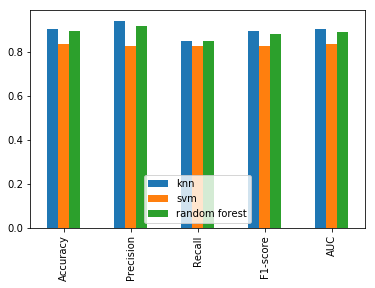

In [14]:
import matplotlib.pyplot as plt
plt.figure();
d = {'knn' : pd.Series([accuracy_knn / 10, precision_knn / 10, recall_knn / 10, f1score_knn / 10, auc_knn / 10], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    ,'svm' : pd.Series([accuracy_svm / 10, precision_svm / 10, recall_svm / 10, f1score_svm / 10, auc_svm / 10], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    ,'random forest' : pd.Series([accuracy_rt / 10, precision_rt / 10, recall_rt / 10, f1score_rt / 10, auc_rt / 10], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    }
df2 = pd.DataFrame(d, columns=['knn', 'svm', 'random forest'])
df2.plot.bar()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

In [ ]:
a=b=c=0